## Dependencies

```
# 60.19.1/10
1273da041af906c8b222591979dd93c870c76cb9  ../../data/suibian/suibian_phones_loglik.csv
c8fb196927a5c8090559f66eea9d9c7726a5c80d  ../../data/suibian/suibian_feats.csv
```

In [1]:
phones_df_path = "../../data/suibian/suibian_phones_loglik.csv"
feats_df_path = "../../data/suibian/suibian_feats.csv"
!sha1sum $phones_df_path $feats_df_path

1273da041af906c8b222591979dd93c870c76cb9  ../../data/suibian/suibian_phones_loglik.csv
c8fb196927a5c8090559f66eea9d9c7726a5c80d  ../../data/suibian/suibian_feats.csv


## Load Data

In [2]:
import pandas as pd
WORD = "隨便"
phones_df = pd.read_csv(phones_df_path)
feats_df = pd.read_csv(feats_df_path)

In [3]:
phones_df.head()

,utt_id,t,phone,ml_phone,sil,spn,a,aj,aw,o,...,ts,tsʰ,ɕ,z,z̩,s,ŋ,ŋ̍,ɻ,ʔ
0,ZXQ_GY_3357,0,s,s,-7.760230,-5.340469,-13.153953,-11.517451,-12.777015,-7.815475,...,-2.632007,-2.135581,-2.840243,-10.105884,-8.159972,-0.920592,-14.133311,-14.133311,-14.201430,-14.459453
1,ZXQ_GY_3357,1,s,ʂ,-8.084499,-4.200573,-14.151817,-13.254002,-14.363815,-12.498680,...,-4.242767,-3.799923,-2.998569,-15.620865,-13.674953,-1.233650,-16.600349,-16.600349,-18.242882,-17.365234
2,ZXQ_GY_3357,2,s,s,-9.565180,-5.604002,-16.109534,-15.350348,-16.072615,-14.419035,...,-5.373827,-4.113650,-3.797114,-17.291193,-15.345286,-0.483443,-18.357508,-18.357508,-18.983919,-17.063307
3,ZXQ_GY_3357,3,s,s,-11.225339,-5.542615,-19.381956,-18.148511,-18.735116,-16.947393,...,-6.444936,-4.965444,-3.570695,-19.574193,-17.628282,-0.388345,-21.288297,-21.288297,-21.166013,-19.876005
4,ZXQ_GY_3357,4,s,s,-13.865740,-12.093344,-27.630392,-26.267866,-26.784742,-21.428354,...,-8.822866,-8.897547,-4.101191,-23.046228,-21.100321,-0.020071,-29.411276,-29.411276,-28.679525,-26.354857


In [4]:
phone_table = phones_df.columns[4:].values
len(phone_table)

45

Text(0.5, 1.0, 'WJL_GY_5857 隨便')

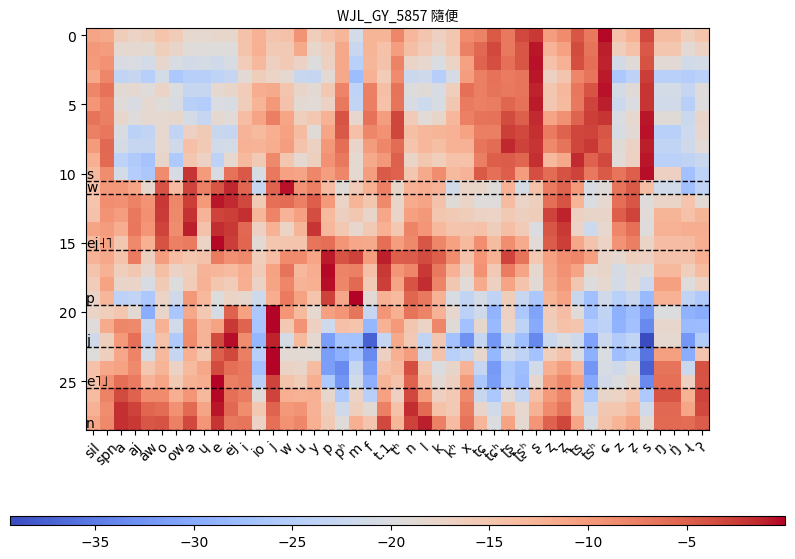

In [12]:
from typing import cast
import matplotlib.pyplot as plt

# retroflex ones
# WJH_GY_1574	0	ʂ
# WZW_GY_1205	0	ʂ
# Annotated retroflex:
# WJL_GY_5857
# LRL_GY_2337
utt_id = "WJL_GY_5857"
utt_df = phones_df.loc[phones_df["utt_id"] == utt_id, :]
pmat = utt_df.iloc[:, 4:].values

fig = plt.figure(figsize=(10, 10*(pmat.shape[0]/pmat.shape[1])+1))
plt.imshow(pmat, 
            cmap="coolwarm")

for phone, phone_grp in utt_df.groupby("phone", sort=False):
    t_end = phone_grp.iloc[-1].t
    phone = cast(str, phone)
    plt.text(-0.5, t_end+0.5, phone, va="bottom")
    plt.axhline(t_end+0.5, color="black", 
            linewidth=1, linestyle="dashed")

xticks = range(0, len(phone_table), 1)
xticklabels = [phone_table[y] for y in xticks]
plt.xticks(xticks, xticklabels, rotation=45) 
plt.colorbar(location="bottom", aspect=80)
plt.title(f"{utt_id} {WORD}", fontsize=20, font="Noto Sans CJK JP")
# fig.savefig(str(fig_dir/f"{utt_x.utt_id}_{word_x.label}.png"))


In [6]:
from pathlib import Path
wav_dir = Path(f"../../data/suibian/suibian/s0").expanduser()
from IPython.display import Audio
Audio(wav_dir/f"{utt_id}.wav", rate=22050)

## Visualize MFCC

In [7]:
feats_df.head()

,utt_id,t,phone,ml_phone,0,1,2,3,4,5,...,30,31,32,33,34,35,36,37,38,39
0,ZXQ_GY_3357,0,s,s,4.618432,-0.184964,-0.364177,2.453522,0.549394,-0.273958,...,0.933356,0.299853,0.184555,-1.392089,-1.189100,-0.050997,-0.535710,-1.323251,0.013057,1.011182
1,ZXQ_GY_3357,1,s,ʂ,4.952896,-0.058228,-0.657546,2.394667,0.712643,0.164565,...,0.630886,0.736375,0.369413,0.145803,-1.167972,-0.643832,-1.585535,-0.641405,-0.322120,-0.592279
2,ZXQ_GY_3357,2,s,s,5.336861,-0.116296,1.396382,2.577351,1.225457,0.104793,...,0.312281,1.808342,0.374470,0.613507,-0.777395,-0.364892,-1.147226,0.847315,-0.049830,0.202007
3,ZXQ_GY_3357,3,s,s,5.777976,0.189630,-0.580745,2.539680,2.015446,0.159386,...,-0.985144,0.845783,0.825462,-0.489850,-0.900715,0.019791,-1.096212,0.208248,0.288644,0.534264
4,ZXQ_GY_3357,4,s,s,5.924967,0.240797,1.075972,3.044248,0.705758,-0.417410,...,-0.298098,0.847601,1.070163,2.050826,-0.590049,1.144273,-1.247941,0.723276,0.679402,0.490433


In [8]:
from sklearnex.manifold import TSNE
base_feat_idx = feats_df.columns.values.tolist().index("ml_phone")+1
feats_mat = feats_df.iloc[:,base_feat_idx:]
tsne = TSNE(perplexity=50)
feats_proj = tsne.fit_transform(feats_mat)


/home/seantyh/miniconda3/envs/mfa/lib/python3.11/site-packages/daal4py/sklearn/manifold/_t_sne.py:361: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn("The PCA initialization in TSNE will change to "


Text(0, 0.5, 'tSNE-2')

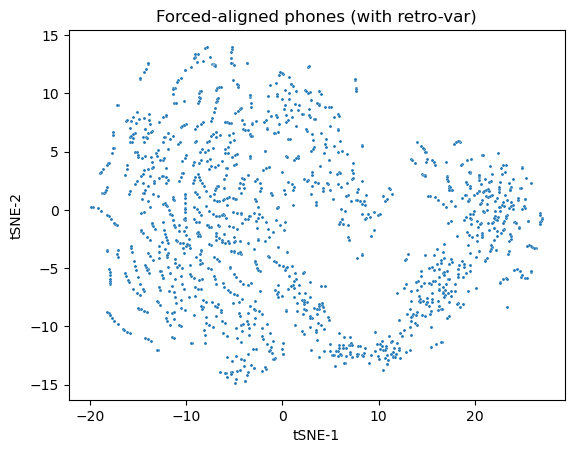

In [9]:
import seaborn as sns
sns.scatterplot(x=feats_proj[:,0], y=feats_proj[:,1], s=5)
plt.title("Forced-aligned phones (with retro-var)")
plt.xlabel("tSNE-1")
plt.ylabel("tSNE-2")


Text(0, 0.5, 'tSNE-2')

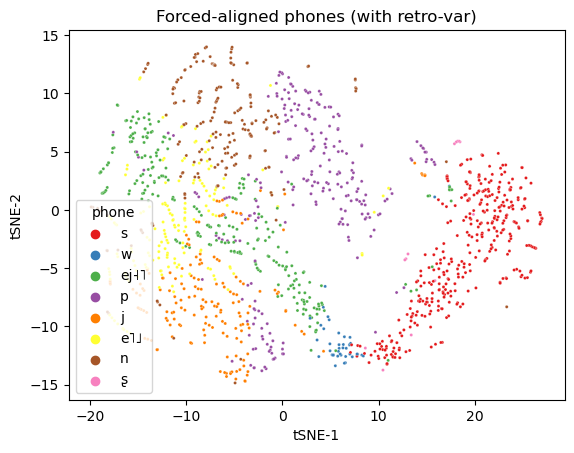

In [10]:
import seaborn as sns
sns.scatterplot(x=feats_proj[:,0], y=feats_proj[:,1], 
                hue=feats_df["phone"], palette="Set1",
                s=5)
plt.title("Forced-aligned phones (with retro-var)")
plt.xlabel("tSNE-1")
plt.ylabel("tSNE-2")


Text(0.5, 0.9, 'max-logLik phones (with retro-var)')

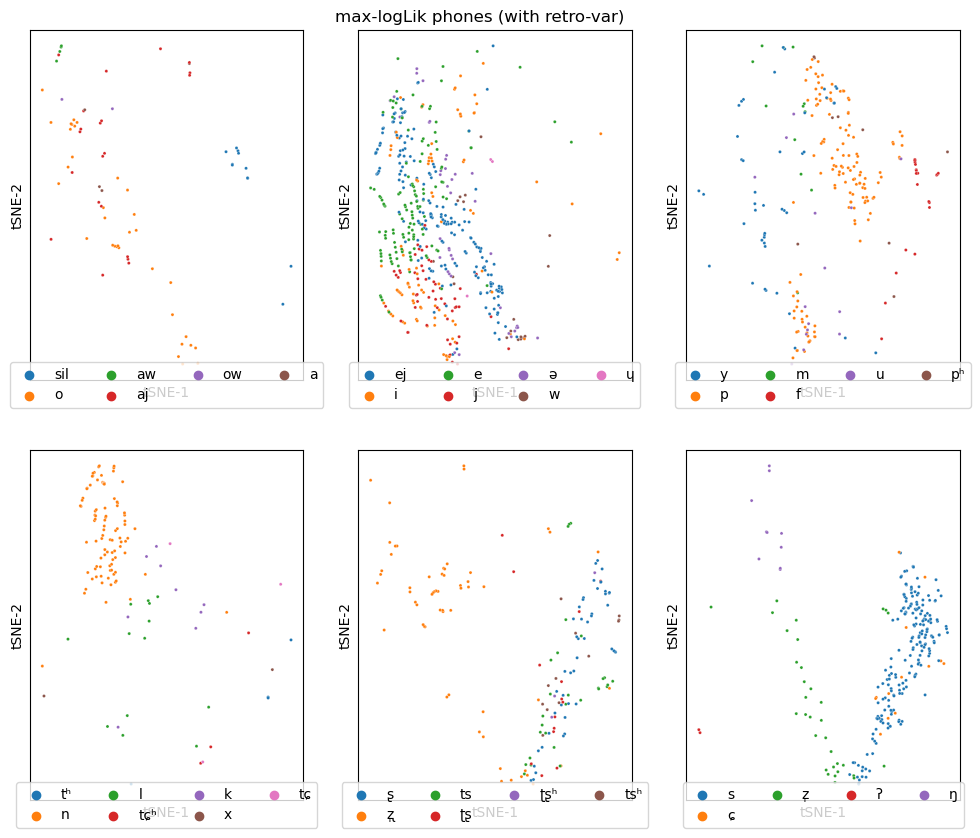

In [11]:
fig = plt.figure(figsize=(12, 10))
for ax_i in range(6):
    plt.subplot(2, 3, ax_i+1)
    sidx = ax_i*len(phone_table)//6
    eidx = (ax_i+1)*len(phone_table)//6
    subset_mask = feats_df["ml_phone"].isin(phone_table[sidx:eidx])
    sns.scatterplot(x=feats_proj[subset_mask,0], y=feats_proj[subset_mask,1], 
                    hue=feats_df["ml_phone"][subset_mask], palette="tab10",
                    s=5)
    plt.xlabel("tSNE-1")
    plt.ylabel("tSNE-2")
    plt.yticks([])
    plt.xticks([])
    plt.gca().legend(loc="lower center", ncols=4, bbox_to_anchor=(0.5, -0.1))
fig.suptitle("max-logLik phones (with retro-var)", y=.9)